In [1]:
import pandas as pd
import numpy as np

# Muat data BTC-USD
btc_data = pd.read_csv('dataset/BTC-USD.csv', parse_dates=['Date'])

# Hitung pengembalian harian
btc_data['daily_return'] = btc_data['Close'].pct_change()

# Hapus baris dengan nilai NaN
#btc_data.dropna(inplace=True)

# Tambahkan kolom tahun
btc_data['Year'] = btc_data['Date'].dt.year

# Hitung volatilitas tahunan
annual_volatility = btc_data.groupby('Year')['daily_return'].std() * np.sqrt(252)
annual_volatility = annual_volatility * 100

# Tampilkan hasil
for year, volatility in annual_volatility.items():
    print(f"Volatilitas untuk tahun {year}: {volatility:.2f}")

Volatilitas untuk tahun 2015: 57.21
Volatilitas untuk tahun 2016: 39.90
Volatilitas untuk tahun 2017: 79.24
Volatilitas untuk tahun 2018: 67.36
Volatilitas untuk tahun 2019: 56.55
Volatilitas untuk tahun 2020: 59.86
Volatilitas untuk tahun 2021: 66.82
Volatilitas untuk tahun 2022: 52.80
Volatilitas untuk tahun 2023: 36.37
Volatilitas untuk tahun 2024: 49.34


In [2]:
import pandas as pd

# Muat data BTC-USD
btc_data = pd.read_csv('dataset/BTC-USD.csv', parse_dates=['Date'])

# Tambahkan kolom tahun
btc_data['Year'] = btc_data['Date'].dt.year

# Hitung harga tertinggi dan terendah setiap tahun
annual_high = btc_data.groupby('Year')['Close'].max().round(2)
annual_low = btc_data.groupby('Year')['Close'].min().round(2)

# Tampilkan hasil
annual_high_low = pd.DataFrame({
    'Annual High': annual_high,
    'Annual Low': annual_low
})

annual_high_low = annual_high_low.reset_index()
print(annual_high_low)

   Year  Annual High  Annual Low
0  2015       465.32      178.10
1  2016       975.92      364.33
2  2017     19497.40      777.76
3  2018     17527.00     3236.76
4  2019     13016.23     3399.47
5  2020     29001.72     4970.79
6  2021     67566.83    29374.15
7  2022     47686.81    15787.28
8  2023     44166.60    16625.08
9  2024     73083.50    39507.37


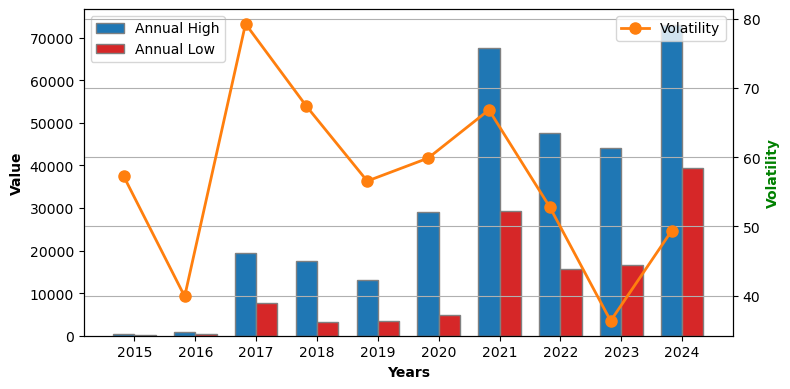

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['2015', '2016', '2017', 
         '2018', '2019', '2020', 
         '2021', '2022', '2023', '2024']
annual_high = [465.32, 975.92, 19497.40, 17527.00, 
               13016.23, 29001.72, 67566.83, 
               47686.81, 44166.60, 73083.50]
annual_low  = [178.10, 364.33, 7777.76, 3236.76, 
              3399.47, 4970.79, 29374.15, 
              15787.28, 16625.08, 39507.37]
volatility  = [57.21, 39.90, 79.24, 67.36, 
              56.55, 59.86, 66.82, 52.80, 36.37, 49.34]

# Plotting
fig, ax1 = plt.subplots(figsize=(8,4))

# Bar plot for Annual High and Low
bar_width = 0.35
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

ax1.bar(r1, annual_high, color='tab:blue', width=bar_width, edgecolor='grey', label='Annual High')
ax1.bar(r2, annual_low, color='tab:red', width=bar_width, edgecolor='grey', label='Annual Low')
ax1.set_xlabel('Years', fontweight='bold')
ax1.set_ylabel('Value', fontweight='bold')
ax1.set_xticks([r + bar_width/2 for r in range(len(years))])
ax1.set_xticklabels(years)
ax1.legend(loc='upper left')

# Creating another y-axis for Volatility
ax2 = ax1.twinx()
ax2.plot(years, volatility, color='tab:orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Volatility')
ax2.set_ylabel('Volatility', color='g', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')


plt.title('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()


In [4]:
# Temukan baris dengan harga terendah dari kolom close
row_with_lowest_price = btc_data.loc[btc_data['Close'].idxmax()]

# Tampilkan tanggal dan harga close yang sesuai
tanggal_harga_terendah = row_with_lowest_price['Date']
harga_terendah = row_with_lowest_price['Close']

print("Tanggal harga terendah BTC-USD:", tanggal_harga_terendah)
print("Harga terendah BTC-USD:", harga_terendah)

Tanggal harga terendah BTC-USD: 2024-03-13 00:00:00
Harga terendah BTC-USD: 73083.5
